# Import Library

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load Dataset & Atribute Description

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
299 baris
13 kolom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
# check for unique values in each column
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


In [8]:
# sampling unique values in column 'age'
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [9]:
# sampling unique values in column 'anaemia'
df['anaemia'].unique()

array([0, 1], dtype=int64)

In [10]:
# sampling unique values in column 'creatinine_phosphokinase'
df['creatinine_phosphokinase'].unique()

array([ 582, 7861,  146,  111,  160,   47,  246,  315,  157,  123,   81,
        231,  981,  168,   80,  379,  149,  125,   52,  128,  220,   63,
        148,  112,  122,   60,   70,   23,  249,  159,   94,  855, 2656,
        235,  124,  571,  127,  588, 1380,  553,  129,  577,   91, 3964,
         69,  260,  371,   75,  607,  789,  364, 7702,  318,  109,   68,
        250,  110,  161,  113, 5882,  224,   92,  102,  203,  336,   76,
         55,  280,   78,   84,  115,   66,  897,  154,  144,  133,  514,
         59,  156,   61,  305,  898, 5209,   53,  328,  748, 1876,  936,
        292,  369,  143,  754,  400,   96,  737,  358,  200,  248,  270,
       1808, 1082,  719,  193, 4540,  646,  281, 1548,  805,  291,  482,
        943,  185,  132, 1610, 2261,  233,   30, 1846,  335,   58,  910,
         72,  130, 2334, 2442,  776,  196,  835, 3966,  171,  198,   95,
       1419,  478,  176,  395,   99,  145,  104, 1896,  151,  244,   62,
        121,  418,  167, 1211, 1767,  308,   97,   

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Cleaning

In [12]:
# check for duplicate data
df.duplicated().sum()

0

In [13]:
# check for missing values
df.isnull().sum().sort_values()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

dataset yang dimiliki sudah bersih sehingga bisa langsung diproses

# Data Exploration

melihat distribusi death event dari atribut *sex, smoking, diabetes, anaemia*, dan *high_blood_pressure*

In [14]:
df_e = df.copy()

In [16]:
# decode categorical data
df_e['DEATH_EVENT'].replace({0:'Bertahan hidup', 1: 'Tidak Bertahan hidup'}, inplace=True)
df_e['sex'].replace({0:'Wanita', 1:'Pria'}, inplace=True)
df_e['smoking'].replace({0:'Tidak Merokok', 1:'Merokok'}, inplace=True)
df_e['diabetes'].replace({0:'Tidak Memiliki Diabetes', 1:'Memiliki Diabetes'}, inplace=True)
df_e['anaemia'].replace({0:'Tidak Memiliki Anemia', 1:'Memiliki Anemia'}, inplace=True)
df_e['high_blood_pressure'].replace({0:'Tidak memiliki Hipertensi', 1:'Memiliki Hipertensi'}, inplace=True)

In [17]:
df_e['DEATH_EVENT'].value_counts()

Bertahan hidup          203
Tidak Bertahan hidup     96
Name: DEATH_EVENT, dtype: int64

dapat terlihat bahwa terdapat 203 manusia yang selamat dan 96 manusia yang tidak selamat dari penyakit kardiovascular

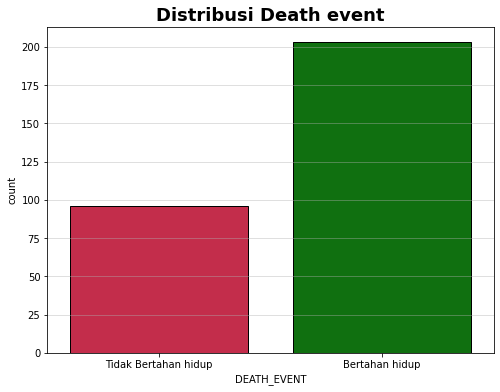

In [18]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='DEATH_EVENT', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data dapat dilihat bahwa data orang-orang yang bertahan hidup lebih tinggi dibandingkan orang-orang yang tidak dapat bertahan hidup saat mengalami penyakit  kardiovaskular

**Q**: bagaimana distribusi penyakit kardiovaskular berdasarkan jenis kelamin?

In [19]:
df_e['sex'].value_counts()

Pria      194
Wanita    105
Name: sex, dtype: int64

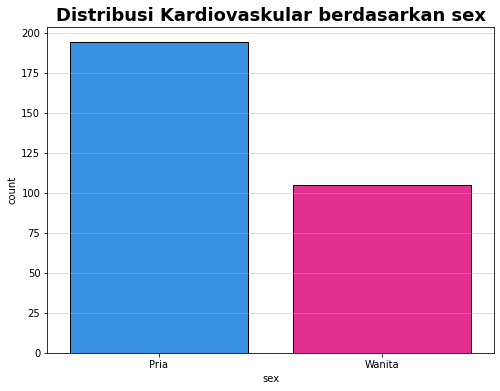

In [21]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Kardiovaskular berdasarkan sex', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='sex', data = df_e, palette = ['#1E90FF', "#FF1493"], edgecolor = "black", linewidth =1)

plt.show()

**A**: Pria lebih banyak mengalami penyakit kardiovaskular dibandingkan wanita

**Q**: bagaimana distribusi penyakit kardiovaskular berdasarkan riwayat merokok?

In [22]:
df_e['smoking'].value_counts()

Tidak Merokok    203
Merokok           96
Name: smoking, dtype: int64

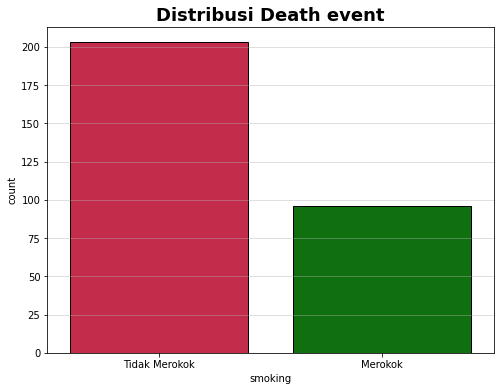

In [23]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='smoking', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

**A** : Menurut data, dapat dilihat bahwa pasien yang tidak merokok lebih banyak mengalami penyakit kardiovaskular dibandingkan dengan pasien yang merokok

**Q:** Berapa banyak pasien kardiovaskular yang memiliki riwayat diabetes dan yang tidak?

In [24]:
df_e['diabetes'].value_counts()

Tidak Memiliki Diabetes    174
Memiliki Diabetes          125
Name: diabetes, dtype: int64

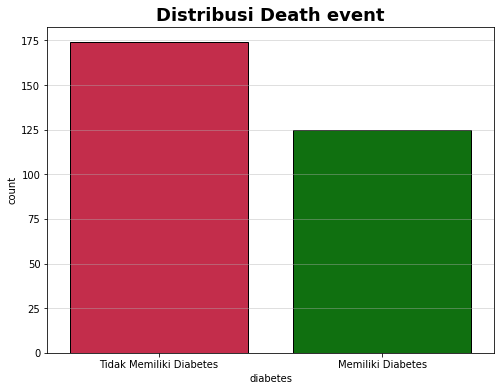

In [25]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='diabetes', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data, dapat dilihat bahwa pasien yang tidak mengalami diabetes lebih banyak dibandingkan pasien yang memiliki riwayat diabetes

**Questions :** Berapa banyak pasien kardiovaskular yang mengalami anaemia dan yang tidak?

In [26]:
df_e['anaemia'].value_counts()

Tidak Memiliki Anemia    170
Memiliki Anemia          129
Name: anaemia, dtype: int64

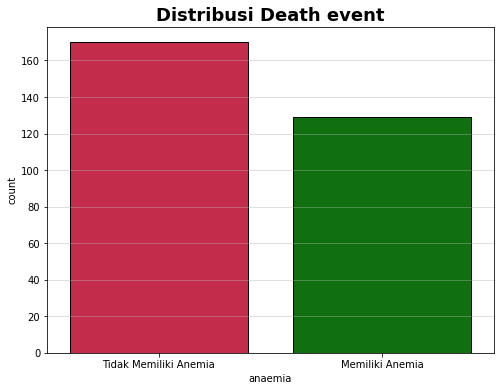

In [27]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='anaemia', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data, dapat dilihat bahwa pasien yang tidak mengalami anaemia lebih banyak dibandingkan pasien yang mengalami anaemia

**Questions :** Berapa banyak pasien yang memiliki riwayat darah tinggi dan yang tidak?

In [28]:
df_e['high_blood_pressure'].value_counts()

Tidak memiliki Hipertensi    194
Memiliki Hipertensi          105
Name: high_blood_pressure, dtype: int64

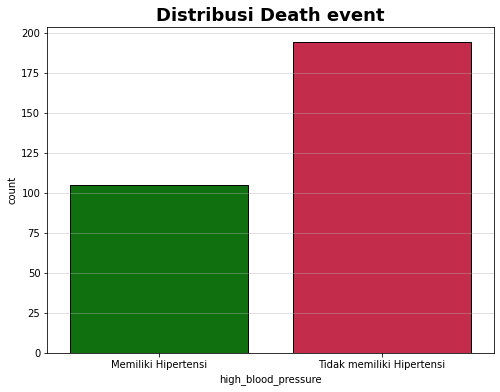

In [29]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='high_blood_pressure', data = df_e, palette = ["#008000",'#DC143C'], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data, dapat dilihat bahwa pasien yang tidak mengalami darah tinggi lebah banyak dibandingkan pasien yang memiliki riwayat darah tinggi

### Analisis Korelasi

In [31]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

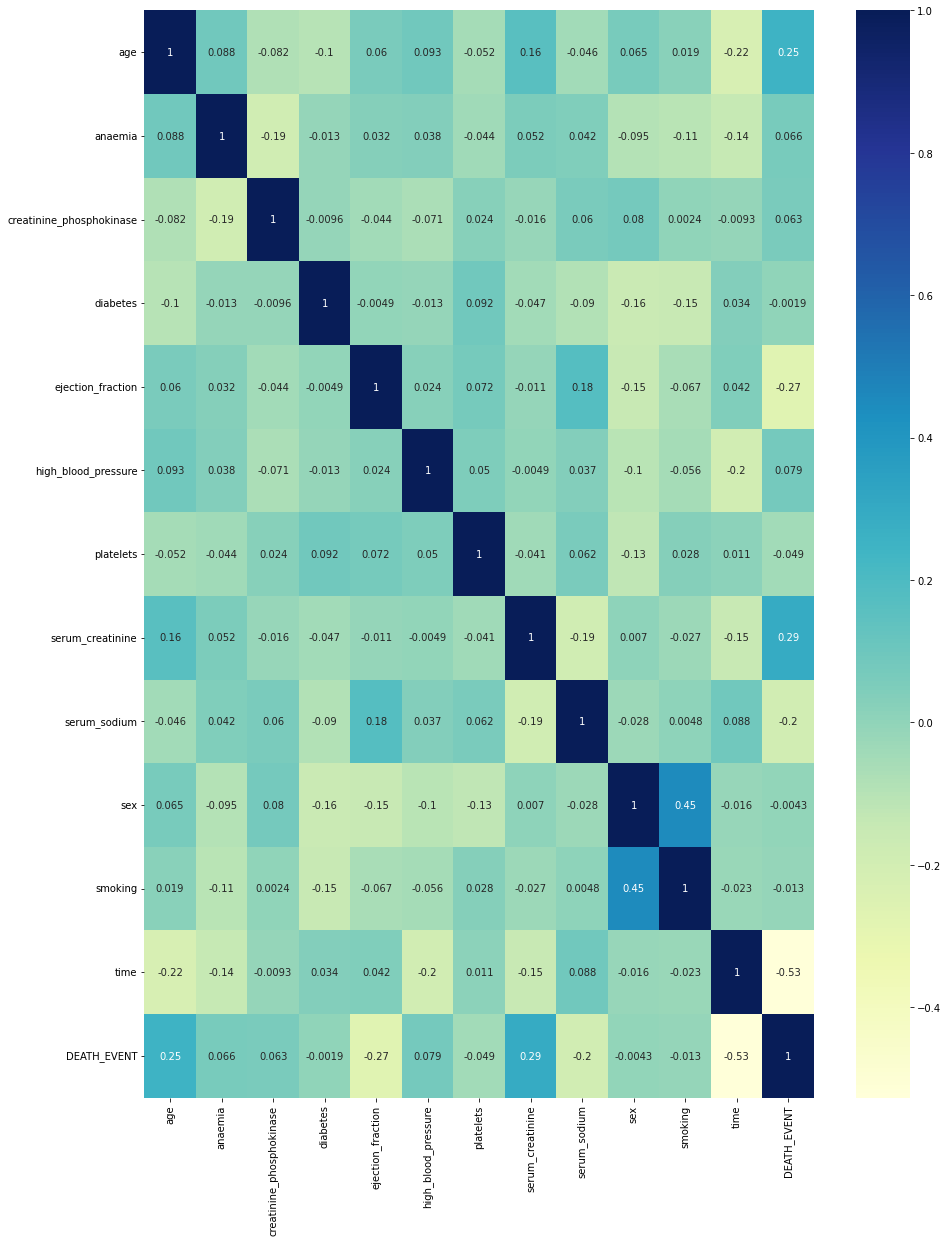

In [32]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

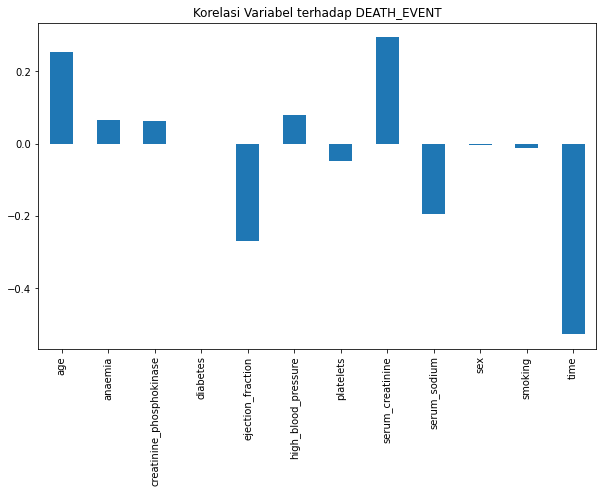

In [33]:
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df.drop(columns=['DEATH_EVENT'], inplace=False).corrwith(df.DEATH_EVENT)
korelasi.plot.bar(title='Korelasi Variabel terhadap DEATH_EVENT');

In [34]:
df.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Analisis :

- Atribut yang memiliki korelasi tertinggi  yaitu atribut serum_creatinine,age,high_blood_pressure,anaemia,creatinine_phosphokinase
- Atribut yang memiliki korelasi negatif yaitu atribut diabetes,sex,smoking,platelets,serum_sodium,ejection_fraction


# Data Preprocessing

In [35]:
df_encode = [i for i in df.columns if i != 'DEATH_EVENT']

### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df_encode] = scaler.fit_transform(df[df_encode])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1


In [37]:
X = df.drop(['DEATH_EVENT'], axis=1)

y = df ['DEATH_EVENT']

# Data Modeling

### Splitting Dataset

In [38]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=10)

## Random Forest

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

pred1  = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

Accuracy Score: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        61
           1       0.71      0.76      0.73        29

    accuracy                           0.82        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.83      0.82      0.82        90



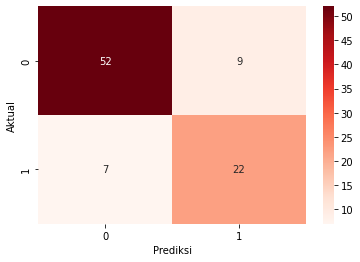

In [40]:
# Menggunakan seaborn untuk CM
cm = confusion_matrix(y_test, pred1)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g');

## XGBClassifier

In [41]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred2  = xgb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

Accuracy Score: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        61
           1       0.85      0.79      0.82        29

    accuracy                           0.89        90
   macro avg       0.88      0.86      0.87        90
weighted avg       0.89      0.89      0.89        90



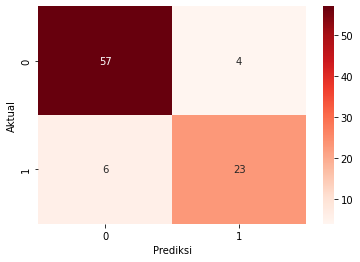

In [42]:
# Menggunakan seaborn untuk CM
cm = confusion_matrix(y_test, pred2)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g');

## Logistic Regression

In [43]:
#menentukan model klasifikasi
model= LogisticRegression()

#training model
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

In [44]:
#prediksi respon untuk dataset test
y_pred3 = model.predict(X_test)

#membuat hasil prediksi kematian akibat gagal ginjal
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['predicted_Death_Event'] = y_pred3
df_test.head(10)

print("Accuracy Score:", str(model.score(X_test, y_test)))

Accuracy Score: 0.7777777777777778


didapatkan akurasi yang cukup baik yaitu 70%

# Conclusions

1. Terdapat 12 atribut yang memengaruhi untuk memprediksi kematian akibat gagal jantung. 
2. Variabel atribut serum_creatinine, age, high_blood_pressure, anaemia, creatinine_phosphokinase yang paling berpengaruh terhadap death event.
3. Model ensemble yang paling optimal menurut kami adalah yaitu model XGB Classifier diperoleh akurasi sebesar 0,88 dengan confusion matrix :
    1. True Positives (Actual Positive:1 and Predict Positive:1) - 57
    2. True Negatives (Actual Negative:0 and Predict Negative:0) - 23
    3. False Positives (Actual Negative:0 but Predict Positive:1) - 4
    4. False Negatives (Actual Positive:1 but Predict Negative:0) - 6